<a href="https://colab.research.google.com/github/NoVA0123/stock-price-prediction/blob/main/share_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
share = 'RELIANCE'
stock_data = yf.download(f'{share}.NS')
# stock_data.to_csv('ap.csv')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df= stock_data[stock_data.index >= '2014-05-15']

In [4]:
# dataframe = pd.read_csv('ap.csv', index = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-15,517.841370,525.023315,514.745728,521.754272,489.697784,9629064
2014-05-16,539.932007,567.248047,526.063416,534.557922,506.280640,24290388
2014-05-19,540.377747,557.094299,538.346985,554.766357,525.420105,10982753
2014-05-20,558.654541,559.199341,532.799622,534.855103,506.562103,10387940
2014-05-21,534.855103,546.296631,531.833740,534.136902,505.881927,10149114


In [5]:
df.dropna(inplace = True)
df.head()

<ipython-input-5-e742b29e66da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-15,517.841370,525.023315,514.745728,521.754272,489.697784,9629064
2014-05-16,539.932007,567.248047,526.063416,534.557922,506.280640,24290388
2014-05-19,540.377747,557.094299,538.346985,554.766357,525.420105,10982753
2014-05-20,558.654541,559.199341,532.799622,534.855103,506.562103,10387940
2014-05-21,534.855103,546.296631,531.833740,534.136902,505.881927,10149114


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [7]:
data = pd.DataFrame()
data = df.drop('Close', axis = 1)

In [8]:
data.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2014-05-15,517.841370,525.023315,514.745728,489.697784,9629064
2014-05-16,539.932007,567.248047,526.063416,506.280640,24290388
2014-05-19,540.377747,557.094299,538.346985,525.420105,10982753
2014-05-20,558.654541,559.199341,532.799622,506.562103,10387940
2014-05-21,534.855103,546.296631,531.833740,505.881927,10149114


In [9]:
X = data.drop('Adj Close', axis = 1).to_numpy()
y = data['Adj Close'].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_pred, y_train, y_pred = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
rfr = RandomForestRegressor(n_estimators = 100,
                            random_state = 3,
                            max_samples = 0.5,
                            max_features = 0.75,
                            max_depth = 15)

In [11]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [12]:
predictions = rfr.predict(x_pred)

In [13]:
print('r2 score: ', r2_score(y_pred, predictions))
print('MAE: ', mean_absolute_error(y_pred, predictions))

r2 score:  0.9997390864453622
MAE:  8.908638786514928


In [14]:
values = np.array([2439.000000, 2440.850098, 2421.649902, 6346812]).reshape(1,4)
values = scaler.fit_transform(values)
rfr.predict(values)

array([1356.06926514])

In [15]:
import matplotlib.pyplot as plt

training_data_len = len(df) - len(predictions)
train = df[:training_data_len]
test = df[training_data_len:]
test['Predictions'] = predictions

<ipython-input-15-1b56a1f73dbe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


In [16]:
test.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2023-12-27,2582.000000,2599.899902,2573.100098,2586.850098,2586.850098,4602078,2321.285767
2023-12-28,2589.800049,2612.000000,2586.850098,2605.550049,2605.550049,6151318,465.418154
2023-12-29,2611.100098,2614.000000,2579.300049,2584.949951,2584.949951,5432292,415.659082
2024-01-01,2580.550049,2606.850098,2573.149902,2590.250000,2590.250000,2015270,2583.601562
2024-01-02,2585.000000,2615.000000,2573.000000,2611.699951,2611.699951,3724400,2307.506118
2024-01-03,2610.000000,2634.000000,2577.199951,2583.300049,2583.300049,4518768,595.459206
2024-01-04,2588.000000,2609.850098,2579.100098,2596.649902,2596.649902,4806389,2472.171890
2024-01-05,2602.899902,2619.850098,2598.000000,2607.699951,2607.699951,4043203,1522.314526
2024-01-08,2610.000000,2631.949951,2568.949951,2587.350098,2587.350098,3867326,455.491065


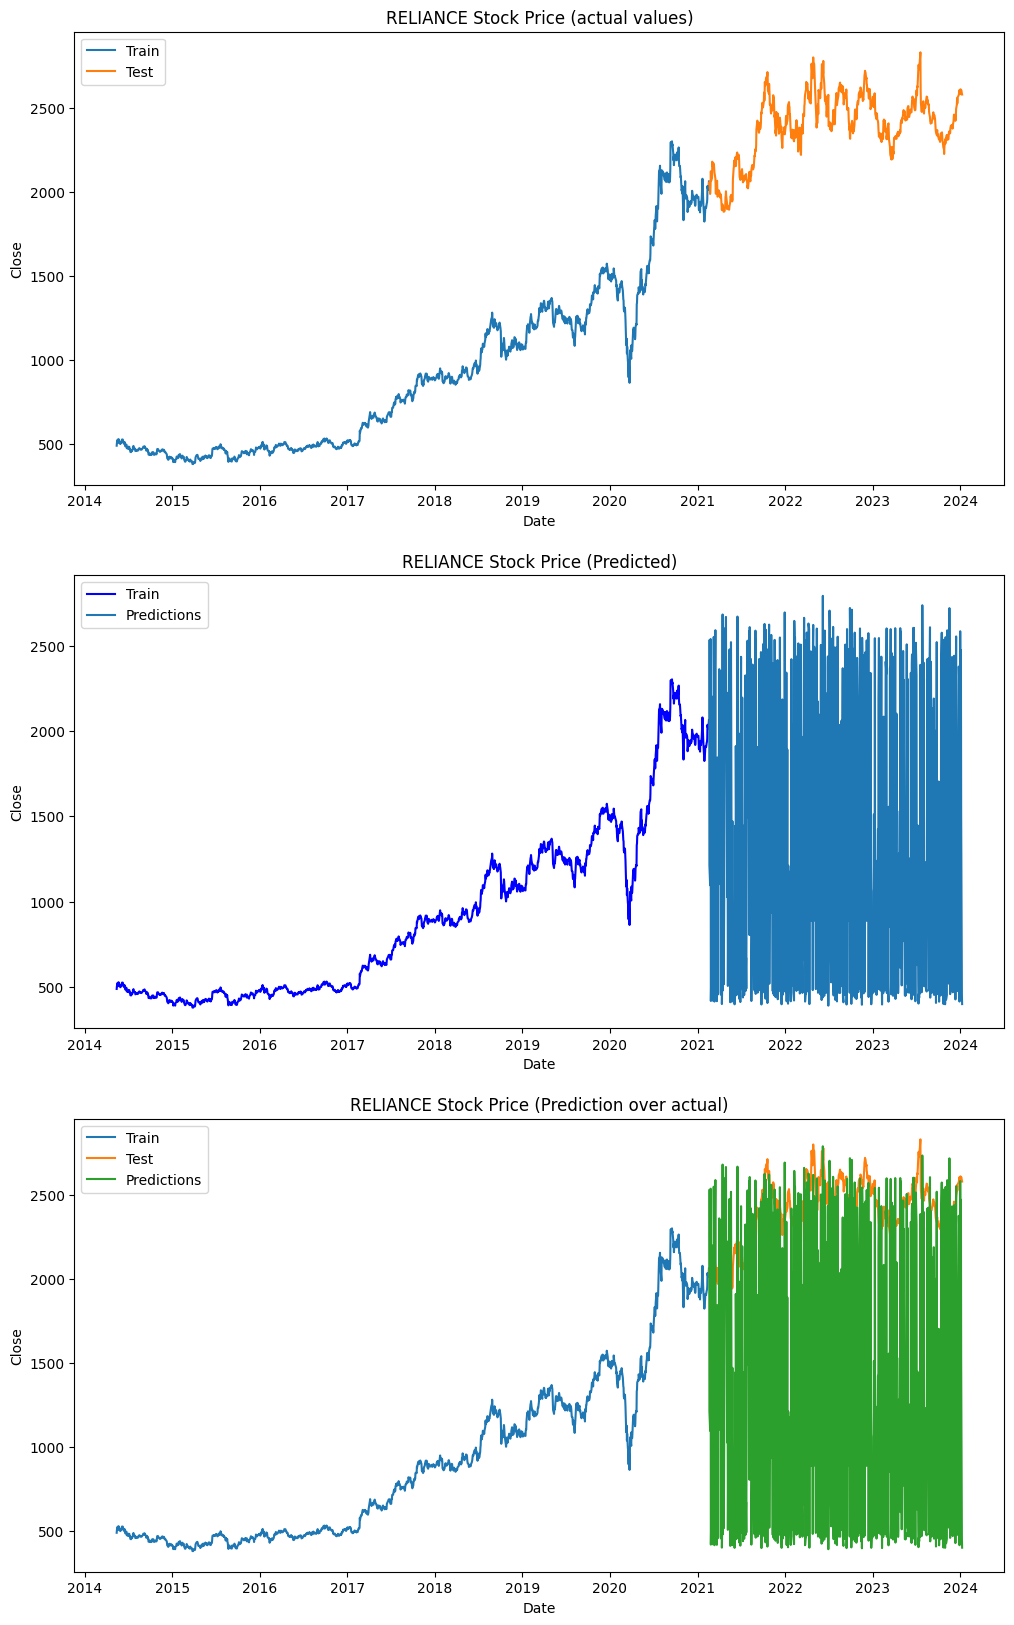

In [17]:

fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 20))

axs[0].plot(train.index, train['Adj Close'])
axs[0].plot(test.index, test[['Adj Close']])
axs[0].set_title(f'{share} Stock Price (actual values)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel("Close")
axs[0].legend(['Train', 'Test'])

axs[1].plot(train.index, train['Adj Close'], color = 'b')
axs[1].plot(test.index, test[['Predictions']])
axs[1].set_title(f'{share} Stock Price (Predicted)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel("Close")
axs[1].legend(['Train','Predictions'])

axs[2].plot(train.index, train['Adj Close'])
axs[2].plot(test.index, test[['Adj Close', 'Predictions']])
axs[2].set_title(f'{share} Stock Price (Prediction over actual)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel("Close")
axs[2].legend(['Train', 'Test', 'Predictions'])